In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.datasets import make_classification

In [182]:
# implementation of logistics regression using perceptron with the step function
# what is step function --> it returns 1 if value not equal to zero and 0 otherwise

class LogisticRegression:
    
    def __init__(self):
        self.lr = None
        self.epoch = None
        self.intercept_ = None
        self.coeff_ = None
        
    def fit_using_perceptron_step_function(self,x_train,y_train,learning_rate,epoch):
        x_train = np.insert(x_train,0,1,axis=1)
        self.lr = learning_rate
        self.epoch = epoch
        weight = np.ones(x_train.shape[1])
        for i in range(self.epoch):
            random_state_index = np.random.randint(0,x_train.shape[0])
            y_hat = self.step(np.dot(x_train[random_state_index],weight))
            weight = weight + self.lr*np.dot((y_train[random_state_index]-y_hat),x_train[random_state_index])
        self.intercept_ = weight[0]
        self.coeff_ = weight[1:]
        return self.intercept_,self.coeff_

    def fit_using_perceptron_sigmoid_function(self,x_train,y_train,learning_rate,epoch):
        x_train = np.insert(x_train,0,1,axis=1)
        self.lr = learning_rate
        self.epoch = epoch
        weight = np.ones(x_train.shape[1])
        for i in range(self.epoch):
            random_state_index = np.random.randint(0,x_train.shape[0])
            y_hat = self.sigmoid(np.dot(x_train[random_state_index],weight))
            weight = weight + self.lr*np.dot((y_train[random_state_index]-y_hat),x_train[random_state_index])
        self.intercept_ = weight[0]
        self.coeff_ = weight[1:]
        return self.intercept_,self.coeff_


    def step(self,prob):
        if prob != 0:
            return 1
        else:
            return 0
        
    def sigmoid(self,prob):
        # it gives better results than step function because it causes randomness
        # this function transforms any number into in the range between 0 to 1.
        if prob == 0:
            return 0.5
        return 1/(1+np.exp(-prob))
    
    def fit_using_gradient_descent(self,x_train,y_train):
        pass
    
    def predict(self,x_test): 
        return np.dot(x_test,self.coeff_) + self.intercept_
    
    def predict_gradient_descent(self,x_test):
        pass

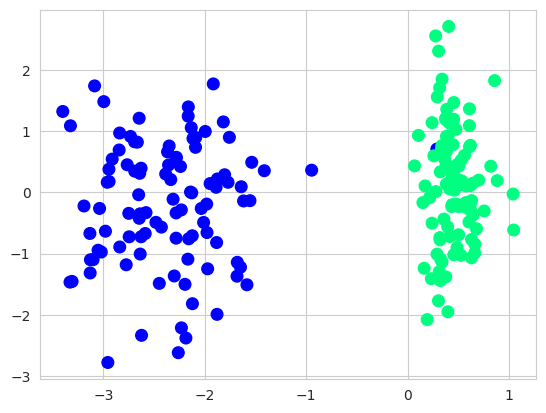

In [111]:
x,y = make_classification(n_samples=200,n_features=2,n_informative=1,n_redundant=0,n_classes=2,
                          n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=15)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=70)

In [178]:
lr = LogisticRegression()
intercept,coefficent = lr.fit_using_perceptron_step_function(x,y,0.01,100)

In [179]:
m = -(coefficent[0]/coefficent[1])
b = -(intercept/coefficent[1])
x_new = np.linspace(-3,3,100)
y_new = m*x_new + b


(-3.0, 2.0)

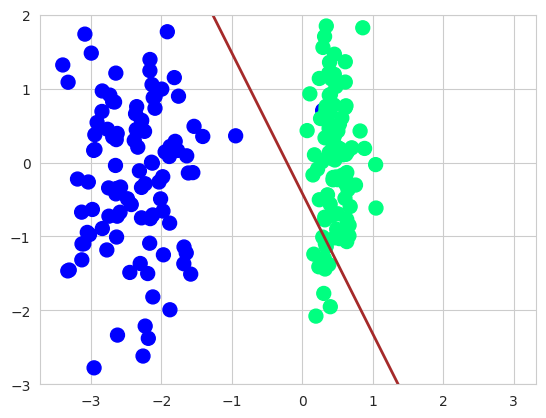

In [181]:
plt.plot(x_new,y_new,color='brown',linewidth=2)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [189]:
# visualization of step function and sigmoid function
def step(arr):
    y = np.random.rand((arr.shape[0]))
    for x in range(arr.shape[0]):
        if arr[x] >= 0:
            y[x] = 1
        elif arr[x]<0:
            y[x] = -1
        else:
            y[x] = 0
    return y
def sigmoid(arr):
    return 1/(1+np.exp(-arr))
arr = np.linspace(-3,3,100)
arr_y_step = step(arr)
arr_y_sigmoid = sigmoid(arr)

Text(0.5, 1.0, 'Step function graph')

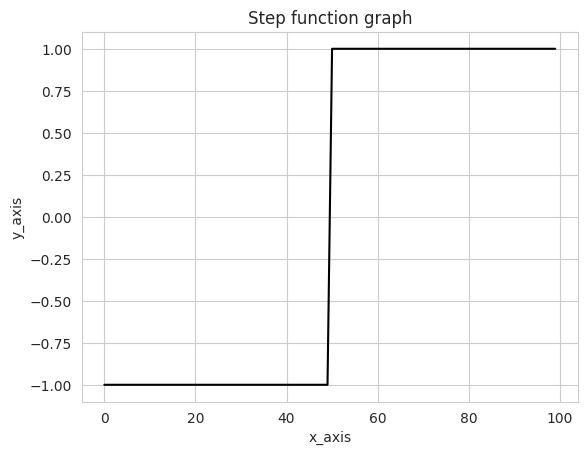

In [264]:
plt.plot(arr_y_step,color='black')
plt.xlabel("x_axis")
plt.ylabel("y_axis")
plt.title("Step function graph")


Text(0.5, 1.0, 'Sigmoid function graph')

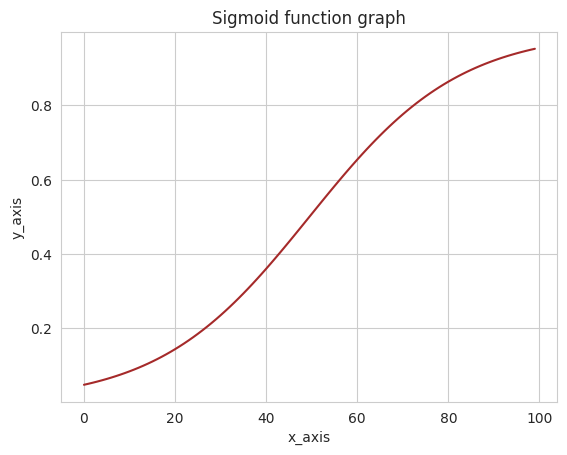

In [219]:
plt.plot(arr_y_sigmoid,color='brown')
plt.xlabel("x_axis")
plt.ylabel("y_axis")
plt.title("Sigmoid function graph")

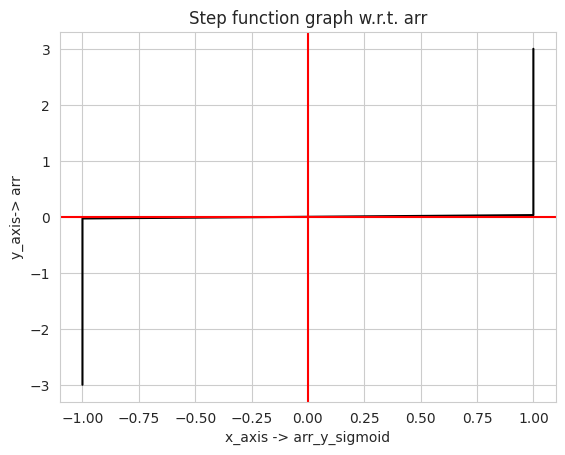

In [258]:
# drawing graph with respect to arr array itself
plt.plot(arr_y_step,arr,color='black')
plt.xlabel("x_axis -> arr_y_sigmoid")
plt.ylabel("y_axis-> arr")
plt.title("Step function graph w.r.t. arr")
plt.axhline(0,color='red')
plt.axvline(0,color='red')

Text(0.5, 1.0, 'Step function graph w.r.t. arr')

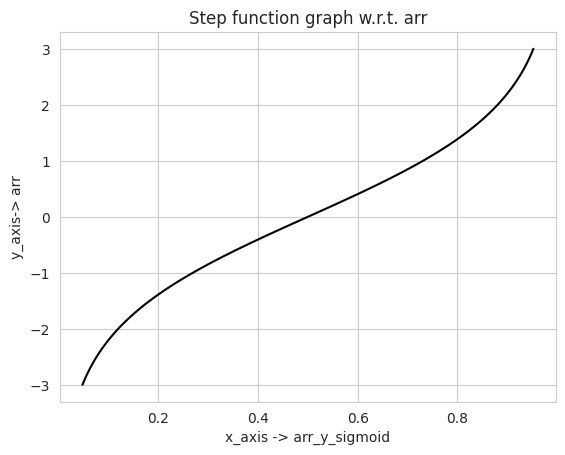

In [253]:
# drawing graph with respect to arr array itself
plt.plot(arr_y_sigmoid,arr,color='black')
plt.xlabel("x_axis -> arr_y_sigmoid")
plt.ylabel("y_axis-> arr")
plt.title("Step function graph w.r.t. arr")

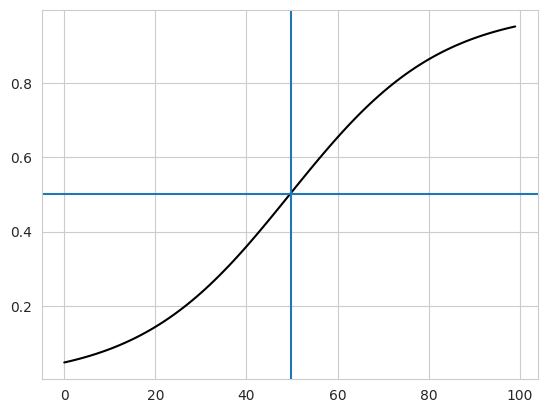

In [251]:
plt.plot(arr_y_sigmoid,color='black')
plt.axhline(0.5) 
plt.axvline(49.8)